# 5.9  CNN-LSTM architectures

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

This type of architecture is useful for different applications, for instance, action recognition in video sequences. In order to show its use, we are going to create a syntethic dataset. 

The dataset is composed of videos where a point moves through the frames forming four different patterns: a constant point, a point ascending from bottom-left corner to top-right corner, a point descending from top-lef corner to bottom-right corner, and a point following a sin function. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import keras.utils as np_utils
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [2]:
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
%matplotlib notebook

In [3]:
import math
t = np.linspace(math.pi/10, 2*math.pi, num=20)
y = np.sin(t) + 0.05*np.random.randn(1, 20)
y = y.flatten()
i = 1
t2 = 6*i
y2 = int(np.round(23*(y[i-1]+1)+4))

In [4]:
def f(t2, y2):
    m = np.zeros((50,130))
    m[y2-3:y2+3,t2-3:t2+3] = 255
    return m

def updatefig(*args):
    global y,i
    if i == 20:
        i = 1
    t2 = 6*i
    y2 = int(np.round(23*(y[i-1]+1)+4))
    i += 1
    im.set_array(f(t2,y2))
    return im,

def updatefig2(*args):
    global y,i
    if i == 20:
        i = 1
    t2 = 6*(i+1)
    y2 = int(np.round(2*(i+1) + 2 + np.random.randn(1)))
    i += 1
    im.set_array(f(t2,y2))
    return im,

In [ ]:
fig = plt.figure()
im = plt.imshow(f(t2, y2))
ani = animation.FuncAnimation(fig, updatefig, interval=50, frames=20, blit=True)

This is an example of a sin pattern.

In [6]:
from IPython.display import HTML
HTML(ani.to_jshtml())

In [7]:
i=1
t2 = 6*(i+1)
y2 = int(np.round(2*(i+1) + 2 + np.random.randn(1)))


fig = plt.figure()
im = plt.imshow(f(t2, y2))
ani = animation.FuncAnimation(fig, updatefig2, interval=50, frames=20, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())

/var/folders/z4/rw10h4p11w183sngnfybnwp40000gn/T/ipykernel_19352/3458172692.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2 = int(np.round(2*(i+1) + 2 + np.random.randn(1)))


<IPython.core.display.Javascript object>

/var/folders/z4/rw10h4p11w183sngnfybnwp40000gn/T/ipykernel_19352/4204114153.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2 = int(np.round(2*(i+1) + 2 + np.random.randn(1)))


The data must have the form **[n_samples,n_times,n_rows,n_columns,n_channels]**

In [9]:
# Class sin
Videos1 = np.zeros((20, 20, 50, 130, 1))
for j in range(20):
    y = np.sin(t) + 0.05 * np.random.randn(20)   # generate 20 scalars directly
    for i in range(20):
        t2 = 6 * (i + 1)
        y2 = int(np.round(23 * (y[i] + 1) + 4))
        Videos1[j, i, :, :, 0] = f(t2, y2) / 255

# Class constant
Videos2 = np.zeros((20, 20, 50, 130, 1))
for j in range(20):
    for i in range(20):
        t2 = int(np.round(25 + np.random.randn()))   # scalar
        y2 = int(np.round(65 + np.random.randn()))   # scalar
        Videos2[j, i, :, :, 0] = f(t2, y2) / 255

# Class ascending
Videos3 = np.zeros((20, 20, 50, 130, 1))
for j in range(20):
    for i in range(20):
        t2 = 6 * (i + 1)
        y2 = int(np.round(2 * (i + 1) + 2 + np.random.randn()))  # scalar
        Videos3[j, i, :, :, 0] = f(t2, y2) / 255

# Class descending
Videos4 = np.zeros((20, 20, 50, 130, 1))
for j in range(20):
    for i in range(20):
        t2 = 6 * (i + 1)
        y2 = int(np.round(2 * (20 - i) + 2 + np.random.randn()))  # scalar
        Videos4[j, i, :, :, 0] = f(t2, y2) / 255

# Concatenate all classes
Videos = np.concatenate((Videos1, Videos2, Videos3, Videos4), axis=0)

In [10]:
Videos.shape

(80, 20, 50, 130, 1)

In [11]:
Y = np.r_[np.zeros(20),np.ones(20),2*np.ones(20),3*np.ones(20)]
Y.shape

(80,)

In [12]:
# convert list of labels to binary class matrix
y_trainOHE = np_utils.to_categorical(Y)
nb_classes = y_trainOHE.shape[1]

In [13]:
nb_classes

4

### There are Three ways to define the network: 

#### 1)

In [ ]:
# define CNN model
cnn = Sequential()
cnn.add(Conv2D(...))
cnn.add(MaxPooling2D(...))
cnn.add(Flatten())
# define LSTM model
model = Sequential()
model.add(TimeDistributed(cnn, ...))
model.add(LSTM(..))
model.add(Dense(...))

#### 2)

In [ ]:
model = Sequential()
# define CNN model
model.add(TimeDistributed(Conv2D(...))
model.add(TimeDistributed(MaxPooling2D(...)))
model.add(TimeDistributed(Flatten()))
# define LSTM model
model.add(LSTM(...))
model.add(Dense(...))

Let's define our architecture:

In [18]:
timesteps = 20   # number of frames in each sequence
rows = 50
columns = 130
channels = 1

model1 = Sequential()
model1.add(layers.Input(shape=(timesteps, rows, columns, channels)))

model1.add(layers.TimeDistributed(layers.Conv2D(filters=5, kernel_size=(4, 4), 
                                                activation='relu', 
                                                padding='same')))
model1.add(layers.TimeDistributed(layers.MaxPooling2D(pool_size=(2, 2))))
model1.add(layers.TimeDistributed(layers.Conv2D(filters=5, kernel_size=(8, 8), 
                                                activation='relu', 
                                                padding='same')))
model1.add(layers.TimeDistributed(layers.MaxPooling2D(pool_size=(2, 2))))
model1.add(layers.TimeDistributed(layers.Conv2D(filters=5, kernel_size=(8, 8), 
                                                activation='relu', 
                                                padding='same')))
model1.add(layers.TimeDistributed(layers.MaxPooling2D(pool_size=(2, 2))))
model1.add(layers.TimeDistributed(layers.Flatten()))

# add the LSTM layer, and a final Dense layer
model1.add(layers.LSTM(units=5, activation='relu', stateful=False))
model1.add(layers.Dense(4, activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_8              │ (None, 20, 50, 130, 5) │            85 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 20, 25, 65, 5)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 20, 25, 65, 5)  │         1,605 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 20, 12, 32, 5)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_12             │ (None, 20, 12, 32, 5)  │         1,605 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 20, 6, 16, 5)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 20, 480)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5)              │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,039 (50.93 KB)

 Trainable params: 13,039 (50.93 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model1.fit(Videos,y_trainOHE,epochs=40)

Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step - accuracy: 0.0391 - loss: 1.3846
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 353ms/step - accuracy: 0.2531 - loss: 1.3721
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 357ms/step - accuracy: 0.2945 - loss: 1.3564
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.3422 - loss: 1.3283
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - accuracy: 0.5734 - loss: 1.2831
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step - accuracy: 0.7344 - loss: 1.2024
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.7477 - loss: 1.0710
Epoch 8/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step - accuracy: 0.5000 - loss: 0.9075
Epoch 9/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step - accuracy: 0.5047 - loss: 0.7354
Epoch 10/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step - accuracy: 0.7539 - loss: 0.4853
Epoch 11/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step - accuracy: 0.7930 - loss: 0.3510
Epoch 12/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step - accuracy: 1.0000 - lo

In [20]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_8              │ (None, 20, 50, 130, 5) │            85 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 20, 25, 65, 5)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 20, 25, 65, 5)  │         1,605 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 20, 12, 32, 5)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_12             │ (None, 20, 12, 32, 5)  │         1,605 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 20, 6, 16, 5)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 20, 480)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5)              │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,119 (152.81 KB)

 Trainable params: 13,039 (50.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,080 (101.88 KB)

Let's create a new set of videos to validate the model:

In [21]:
# Class sin
Videos1 = np.zeros((20, 20, 50, 130, 1))
for j in range(20):
    y = np.sin(t) + 0.05 * np.random.randn(20)   # generate 20 scalars directly
    for i in range(20):
        t2 = 6 * (i + 1)
        y2 = int(np.round(23 * (y[i] + 1) + 4))
        Videos1[j, i, :, :, 0] = f(t2, y2) / 255

# Class constant
Videos2 = np.zeros((20, 20, 50, 130, 1))
for j in range(20):
    for i in range(20):
        t2 = int(np.round(25 + np.random.randn()))   # scalar
        y2 = int(np.round(65 + np.random.randn()))   # scalar
        Videos2[j, i, :, :, 0] = f(t2, y2) / 255

# Class ascending
Videos3 = np.zeros((20, 20, 50, 130, 1))
for j in range(20):
    for i in range(20):
        t2 = 6 * (i + 1)
        y2 = int(np.round(2 * (i + 1) + 2 + np.random.randn()))  # scalar
        Videos3[j, i, :, :, 0] = f(t2, y2) / 255

# Class descending
Videos4 = np.zeros((20, 20, 50, 130, 1))
for j in range(20):
    for i in range(20):
        t2 = 6 * (i + 1)
        y2 = int(np.round(2 * (20 - i) + 2 + np.random.randn()))  # scalar
        Videos4[j, i, :, :, 0] = f(t2, y2) / 255

# Concatenate all classes
VideosTest = np.concatenate((Videos1, Videos2, Videos3, Videos4), axis=0)

In [22]:
y_est = np.argmax(model1.predict(VideosTest),axis=1)
print('accuracy testing = {}'.format(np.sum(y_est==Y)/80))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step
accuracy testing = 1.0


#### 3) Convolutional LSTM

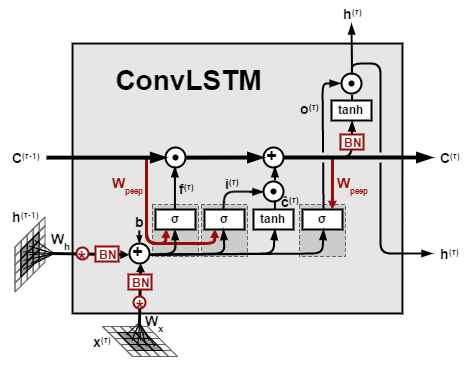

In [25]:
from IPython.display import Image
Image(filename='local/imgs/ConvLSTM.png', width=600)

[Image taken from here](https://medium.com/neuronio/an-introduction-to-convlstm-55c9025563a7)


[ConvLSTMs](https://arxiv.org/pdf/1506.04214.pdf) are similar to a LSTMs, but the internal matrix multiplications are replaced by convolutions. The object that flows trough the cell is a 3D tensor instead of being just a 1D vector with features, like in ['peephole' LSTMs](https://www.jmlr.org/papers/volume3/gers02a/gers02a.pdf).

In [24]:
timesteps = 20   # number of frames in each sequence
rows = 50
columns = 130
channels = 1

model2 = Sequential()
model2.add(layers.Input(shape=(timesteps, rows, columns, channels)))
model2.add(layers.ConvLSTM2D(filters=5, kernel_size=(4, 4), 
                                 activation='relu', 
                                 padding='same', 
                                 return_sequences=True))
model2.add(layers.TimeDistributed(layers.MaxPooling2D(pool_size=(2, 2))))
model2.add(layers.ConvLSTM2D(filters=5, kernel_size=(8, 8), 
                                 activation='relu', 
                                padding='same', 
                                return_sequences=True))
model2.add(layers.TimeDistributed(layers.MaxPooling2D(pool_size=(2, 2))))
model2.add(layers.ConvLSTM2D(filters=5, kernel_size=(8, 8), 
                                 activation='relu', 
                                 padding='same'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())

model2.add(layers.Dense(4, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model2.fit(Videos,y_trainOHE,epochs=80)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3359 - loss: 1.3854
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4688 - loss: 1.3780
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6477 - loss: 1.3416
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4922 - loss: 1.2499
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7695 - loss: 1.0434
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7234 - loss: 1.0597
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5117 - loss: 0.7980
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5828 - loss: 0.6301
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7344 - loss: 0.5966
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7617 - loss: 0.3903
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7422 - loss: 0.3472
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8383 - loss: 0.3214
Epoch 13/80
3/3 ━━━━━━━━━

In [26]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)        │ (None, 20, 50, 130, 5) │         1,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 20, 25, 65, 5)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_1 (ConvLSTM2D)      │ (None, 20, 25, 65, 5)  │        12,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 20, 12, 32, 5)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_2 (ConvLSTM2D)      │ (None, 12, 32, 5)      │        12,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 16, 5)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,924 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,514 (345.76 KB)

 Trainable params: 29,504 (115.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59,010 (230.51 KB)

In [27]:
y_est = np.argmax(model2.predict(VideosTest),axis=1)
print('accuracy testing = {}'.format(np.sum(y_est==Y)/80))

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 956ms/step
accuracy testing = 1.0
